# BEE 4750 Homework 2: Dissolved Oxygen

**Name**: Christine Swanson

**ID**: cms549

> **Due Date**
>
> Friday, 09/22/23, 9:00pm

## Overview

### Instructions

This assignment asks you to use a simulation model for dissolved oxygen
to assess the impacts of two wastewater streams, including minimum
treatment levels and the impact of uncertain environmental conditions.
You will also be asked to identify a minimum distance for the addition
of a third discharge stream.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [15]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\chris\Box\classwork\2023_Fall\BEE5750\hw\hw02-christinemswanson`

In [16]:
using Plots
using LaTeXStrings
using Distributions
using Statistics

## Problems (Total: 40 Points)

A river which flows at 6 km/d is receiving waste discharges from two
sources which are 15 km apart, as shown in
<a href="#fig-river" class="quarto-xref">Figure 1</a>. The oxygen
reaeration rate is 0.55 day<sup>-1</sup>, and the decay rates of CBOD
and NBOD are are 0.35 and 0.25 day<sup>-1</sup>, respectively. The
river’s saturated dissolved oxygen concentration is 10m g/L.

![Figure 1: Schematic of the
system](attachment:figures/river_diagram.png)

### Problem 1 (8 points)

If the characteristics of the river inflow and waste discharges are
given in <a href="#tbl-river" class="quarto-xref">Table 1</a>, write a
Julia model to compute the dissolved oxygen concentration from the first
wastewater discharge to an arbitrary distance `d` km downstream. Use
your model to compute the maximum dissolved oxygen concentration up to
50km downstream and how far downriver this maximum occurs.

|    Parameter     |            River Inflow |         Waste Stream 1 |         Waste Stream 2 |
|:----------------:|------------------------:|-----------------------:|-----------------------:|
|      Inflow      | 100,000 m<sup>3</sup>/d | 10,000 m<sup>3</sup>/d | 15,000 m<sup>3</sup>/d |
| DO Concentration |                7.5 mg/L |                 5 mg/L |                 5 mg/L |
|       CBOD       |                  5 mg/L |                50 mg/L |                45 mg/L |
|       NBOD       |                  5 mg/L |                35 mg/L |                35 mg/L |

Table 1: River inflow and waste stream characteristics for Problem 1.

Response: The minimum DO concentration occurs at approximately 20.5 km downstream, which has an associated value of 4.39 mg/L (see below).

In [171]:
# DO model

function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    a1 = exp(-ka * x / U)
    a2 = (kc / (ka - kc)) * (exp(-kc * x / U) - a1)
    a3 = (kn / (ka - kn)) * (exp(-kn * x / U) - a1)
    C = (Cs * (1 - a1)) + (C0 * a1) - (B0 * a2) - (N0 * a3)

    B0 = B0 * exp(-kc * x / U)
    N0 = N0 * exp(-kn * x / U) 

    print("B0 is", B0, "N0 is", N0)
    return C
end

dissolved_oxygen (generic function with 1 method)

In [170]:
x = 0:0.1:15 # set the distance 
C_1 = (y -> dissolved_oxygen(y, 10, 7.27, 9.09, 7.73, 0.55, 0.35, 0.25, 6)).(x) # I calculated C0, N0, and B0 by hand

B0 is9.09N0 is7.73B0 is9.037129355967554N0 is7.6978586742627B0 is8.984566226236582N0 is7.665850992098512B0 is8.932308822195516N0 is7.633976397817704B0 is8.88035536563598N0 is7.602234338041104B0 is8.828704088692286N0 is7.5706242616904875B0 is8.777353233781279N0 is7.539145619979013B0 is8.726301053542523N0 is7.507797866401692B0 is8.675545810778848N0 is7.476580456725906B0 is8.625085778397233N0 is7.445492848981953B0 is8.574919239350043N0 is7.4145345034536385B0 is8.525044486576594N0 is7.383704882668909B0 is8.47545982294507N0 is7.35300345139052B0 is8.42616356119477N0 is7.322429676606737B0 is8.377154023878697N0 is7.291983027522095B0 is8.328429543306479N0 is7.261662975548169B0 is8.279988461487614N0 is7.2314689942944055B0 is8.231829130075065N0 is7.2014005595589845B0 is8.183949910309154N0 is7.171457149319714B0 is8.136349172961813N0 is7.14163824372497B0 is8.089025298281136N0 is7.1119433250846695B0 is8.041976675936265N0 is7.082371877861284B0 is7.995201704962595N0 is7.052923388660892B0 is7.948698793

151-element Vector{Float64}:
 7.27
 7.210287468684139
 7.151558941408789
 7.093803105773068
 7.037008765254879
 6.981164838083742
 6.92626035612431
 6.872284463770458
 6.81922641684984
 6.767075581538838
 ⋮
 4.82507303239822
 4.831600254132351
 4.838275237864572
 4.84509555153357
 4.8520587910659625
 4.859162580089342
 4.866404569648054
 4.873782437921795
 4.881293889946921

In [172]:
# from waste point 2 to end
x_2 = 0:0.1:35 # need to reset the distance at the next box (x - 15)
C_2 = (y -> dissolved_oxygen(y, 10, 4.89, 8.834, 7.84, 0.55, 0.35, 0.25, 6)).(x_2) # I calculated C0, N0, and B0 by hand

B0 is8.834N0 is7.84B0 is8.782618342202131N0 is7.807401294465662B0 is8.73153553823696N0 is7.774938134288788B0 is8.680749849865256N0 is7.74260995587203B0 is8.630259548958001N0 is7.710416197961481B0 is8.580062917437585N0 is7.678356301636923B0 is8.530158247219342N0 is7.646429710302129B0 is8.480543840153427N0 is7.614635869675195B0 is8.431218007967034N0 is7.5829742277789265B0 is8.382179072206949N0 is7.5514442349312425B0 is8.33342536418243N0 is7.520045343735643B0 is8.28495522490843N0 is7.4887770090717005B0 is8.236767005049147N0 is7.457638688085598B0 is8.18885906486189N0 is7.426629840180701B0 is8.1412297741413N0 is7.395749927008178B0 is8.093877512163854N0 is7.36499841245765B0 is8.046800667632738N0 is7.334374762647883B0 is7.999997638623006N0 is7.303878445917521B0 is7.95346683252707N0 is7.273508932815854B0 is7.907206666000512N0 is7.24326569609363B0 is7.861215564908202N0 is7.213148210693895B0 is7.815491964270733N0 is7.18315595374288B0 is7.770034308211173N0 is7.15328840454093B0 is7.724841049902117

B0 is2.282507409815066N0 is2.981934251659787B0 is2.2692315421840705N0 is2.9695353745433826B0 is2.2560328916786783N0 is2.9571880519351503B0 is2.2429110091768703N0 is2.9448920694715413B0 is2.229865448168878N0 is2.932647213680328B0 is2.216895764741993N0 is2.9204532719769016B0 is2.204001517565457N0 is2.908310032660579B0 is2.1911822678754493N0 is2.8962172849109282B0 is2.178437579460152N0 is2.884174818784108B0 is2.1657670186449103N0 is2.872182425209223B0 is2.1531701542774755N0 is2.8602398959846953B0 is2.1406465577133287N0 is2.8483470237746484B0 is2.128195802801102N0 is2.836503602105307B0 is2.1158174658680715N0 is2.824709425361414B0 is2.1035111257057455N0 is2.81296428878266B0 is2.091276363555528N0 is2.801267988460131B0 is2.07911276309447N0 is2.78962032133276B0 is2.0670199104211058N0 is2.7780210851838154B0 is2.0549973940413637N0 is2.7664700786373753B0 is2.0430448048545684N0 is2.7549671011548424B0 is2.0311617361395187N0 is2.7435119530314576B0 is2.019347783540645N0 is2.732104435392834B0 is2.0076

351-element Vector{Float64}:
 4.89
 4.853031334630782
 4.816832412740237
 4.7813939192786465
 4.746706636590768
 4.712761443458899
 4.679549314155053
 4.6470613175021604
 4.615288615944212
 4.584222464625259
 ⋮
 7.060374047720908
 7.072436433043778
 7.084461664771238
 7.096449711648666
 7.108400544636508
 7.120314136879773
 7.132190463677851
 7.144029502454692
 7.1558312327292795

### Problem 2 (4 points)

Use your model to plot the dissolved oxygen concentration in the river
from the first waste stream to 50km downstream. What do you notice?

In [173]:
# append the 2 vectors at both distance intervals together (2 boxes)
C_combined = [C_1; C_2];

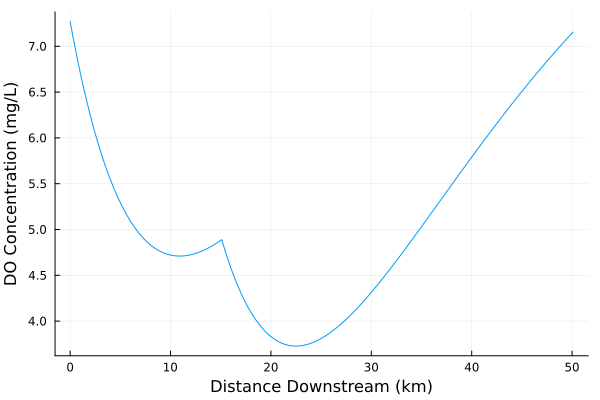

In [174]:
# plot [DO] versus distance downstream

x_axis = collect(0:0.1:50.1) # create the x-axis for the plot
plot(x_axis, C_combined, xlabel = "Distance Downstream (km)", ylabel = "DO Concentration (mg/L)", legend = false)

I notice that there are two "sag curves" smushed together, which is what I would expect. I also notice that the [DO] dips below 4 mg/L a little bit after waste point 2. 

In [177]:
min_val = findmin(C_combined) # find minimum value in the array and the associated index position
x_axis[min_val[2]] # extract the distance

22.5

So, the minimum DO value that occurs is 3.73 mg/L. This occurs at approximately 22.5 km downstream.  

In [178]:
max_val = findmax(C_combined) # find the minimum value in the array and the associated index position

(7.27, 1)

So, the maximum DO value that occurs is 7.27 mg/L. This occurs at 0 km downstream.

### Problem 3 (3 points)

Under the assumptions of Problem 1, determine the distance from waste
stream 2 it will take for the dissolved oxygen concentration of the
river to recover to 6 mg/L.

In [241]:
C_greater_6 = [] # initialize empty vector


for i_val in C_combined
    if i_val >= 6 # just extract values greater than or equal to 6
        push!(C_greater_6, i_val)
    end
end
return C_greater_6;

In [242]:
findall(item -> item == 6.012266462959425, C_greater_6) # extracted the value to look for from running the above code on the C_2 vector

1-element Vector{Int64}:
 28

So, the distance from waste stream 2 to recover to 6 mg/L is 28 km. 

### Problem 4 (5 points)

What is the minimum level of treatment (% removal of organic waste) for
waste stream 2 that will ensure that the dissolved oxygen concentration
never drops below 4 mg/L, assuming that waste stream 1 remains
untreated?

### Problem 5 (5 points)

If both waste streams are treated equally, what is the minimum level of
treatment (% removal of organic waste) for the two sources required to
ensure that the dissolved oxygen concentration never drops below 4 mg/L?

### Problem 6 (5 points)

Suppose you are responsible for designing a waste treatment plan for
discharges into the river, with a regulatory mandate to keep the
dissolved oxygen concentration above 4 mg/L. Discuss whether you’d opt
to treat waste stream 2 alone or both waste streams equally. What other
information might you need to make a conclusion, if any?

### Problem 7 (5 points)

Suppose that it is known that the DO concentrations at the river inflow
can vary uniformly between 6 mg/L and 8 mg/L. How often will the
treatment plan identified in Problem 5 (both waste streams treated
equally) fail to comply with the regulatory standard?

### Problem 8 (5 points)

A factory is planning a third wastewater discharge into the river
downstream of the second plant. This discharge would consist of 5
m<sup>3</sup>/day of wastewater with a dissolved oxygen content of 4.5
mg/L and CBOD and NBOD levels of 50 and 45 mg/L, respectively.

Assume that the treatment plan you identified in Problem 5 is still in
place for the existing discharges. If the third discharge will not be
treated, under the original inflow conditions (7.5 mg/L DO), how far
downstream from the second discharge does this third discharge need to
be placed to keep the river concentration from dropping below 4 mg/L?

## References

List any external references consulted, including classmates.